# Applying k-means to real datasets

`Espen Fanavoll`

In a previous notebook the k-means algorithm was demonstrated by coding it from scratch and applying it to some artficial two-dimensional clusters. Now I will demonstrate the use of the sklearn KMeans algorithm on some real world data sets.

Note that while k-means is an algorithm for grouping *unlabelled* data, the datasets we are using here are labelled, and we'll be albe to evaluate the performance using the known target labels.

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns
from timeit import timeit

# The **digits** dataset

The sklearn digits dataset is a sample of a bigger collection of handwrited digi

In [34]:
digits = datasets.load_digits()

print(dir(digits))
print(digits.images[2])

['DESCR', 'data', 'images', 'target', 'target_names']
[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


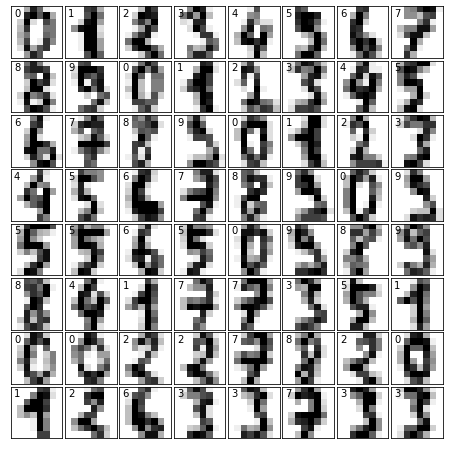

In [36]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.data[i].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 1, str(digits.target[i]), c='k')
plt.show()

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(dir(mnist))

['DESCR', 'categories', 'data', 'details', 'feature_names', 'target', 'url']


In [5]:
print(mnist.DESCR)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

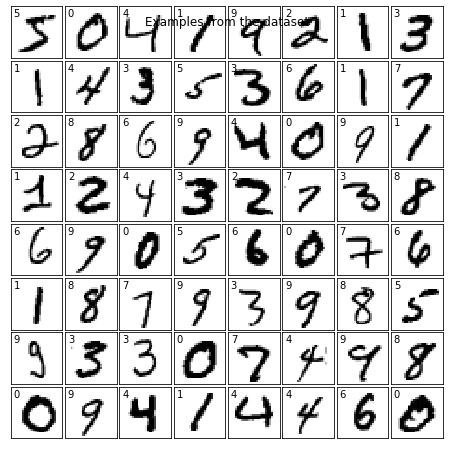

In [25]:
# Plot some examples from the dataset
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(mnist.data[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    ax.text(1, 5, str(mnist.target[i]), c='k')
fig.suptitle('Examples from the dataset')
plt.show()

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0